### Importación de datos



In [116]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [117]:
# modificando nombres de las últimas 2 columnas

tienda = tienda.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda2 = tienda2.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda3 = tienda3.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})
tienda4 = tienda4.rename(columns={'Costo de envío': 'Costo de Envío', 'Método de pago': 'Método de Pago', 'Cantidad de cuotas': 'Cantidad de Cuotas', 'lat': 'Latitud', 'lon': 'Longitud'})

tienda4.head(2)

,Producto,Categoría del Producto,Precio,Costo de Envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de Pago,Cantidad de Cuotas,Latitud,Longitud
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


#1. Análisis de facturación



In [118]:
# facturación total de cada tienda (4)

# fn que accede a la col "precio" de una tienda y devuelve la suma de todos sus valores
def facturacion(tienda): 
    return tienda['Precio'].sum()

# def diccionario (fabricación de pares clave-valor con la fn recién creada)
resultados = {
    'tienda': int(facturacion(tienda)),
    'tienda2': int(facturacion(tienda2)),
    'tienda3': int(facturacion(tienda3)),
    'tienda4': int(facturacion(tienda4))
}

print(f'Facturación total de cada tienda: {resultados}')

Facturación total de cada tienda: {'tienda': 1150880400, 'tienda2': 1116343500, 'tienda3': 1098019600, 'tienda4': 1038375700}


In [119]:
# presentando los valores con mayor prolijidad
print('Facturación total de cada tienda:')
for tiendax, facturacion in resultados.items():
    print(f'{tiendax} = ${facturacion:,.0f}') 
    

# :     -> iniciador f-string, seguido del 
# ,     -> separador de unidad de mil
# .0f   -> formato de punto fijo con 0 decimales

Facturación total de cada tienda:
tienda = $1,150,880,400
tienda2 = $1,116,343,500
tienda3 = $1,098,019,600
tienda4 = $1,038,375,700


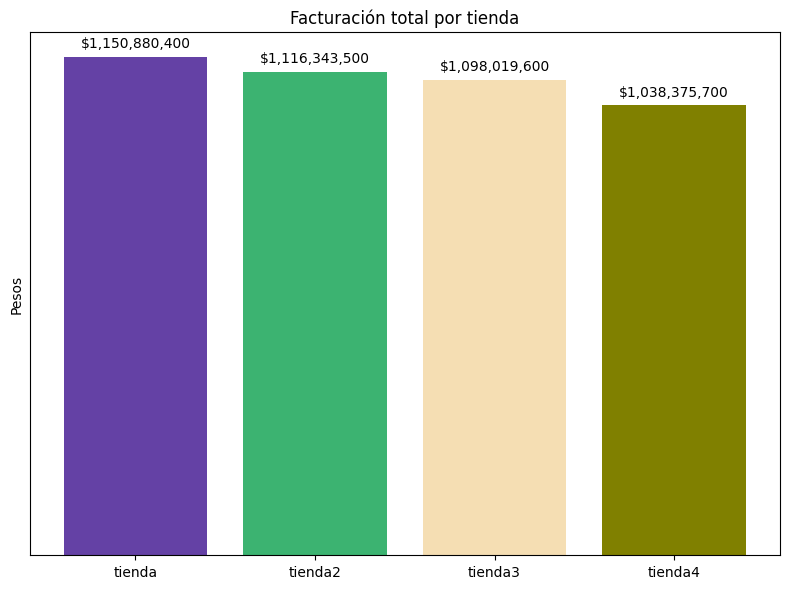

In [120]:
# agregar un gráfico que muestre un comparador en 100% 

import matplotlib.pyplot as plt

# ejes
nombres = list(resultados.keys())           # x
montos = list(resultados.values())          # y

# lienzo
fig, ax = plt.subplots(figsize=(8,6))

colores = ['#6441a5', 'mediumseagreen', 'wheat', 'olive']

# Graficar barras
ax.bar(nombres, montos, color=colores) # color twitch
ax.set_title('Facturación total por tienda')
ax.set_ylabel('Pesos')

# Anotar cada barra con su valor
for i, monto in enumerate(montos): 
    ax.text(i, monto + max(montos)*0.02, f'${monto:,}', ha='center') # coloca la etiqueta 2% arriba de la bar

plt.yticks([])
plt.tight_layout()
plt.show()





# 2. Ventas por categoría

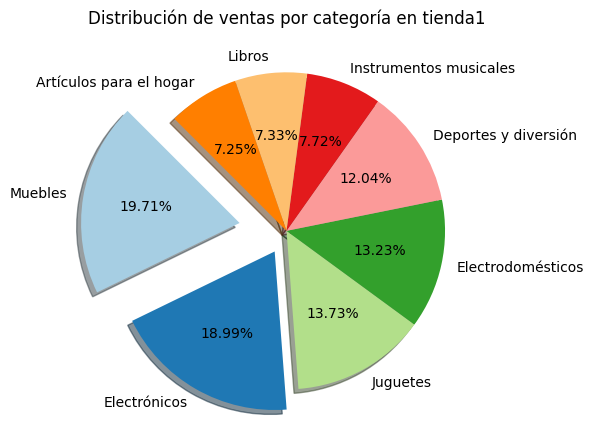

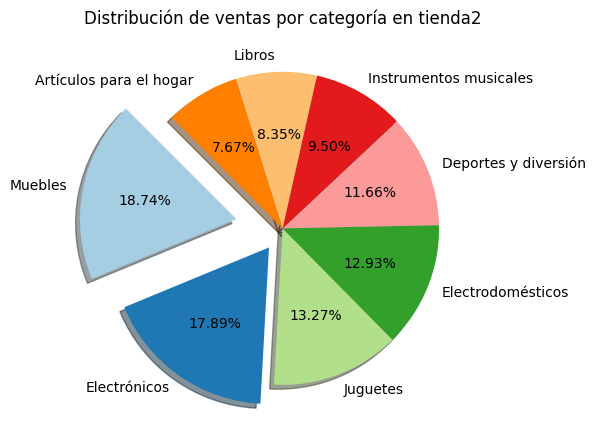

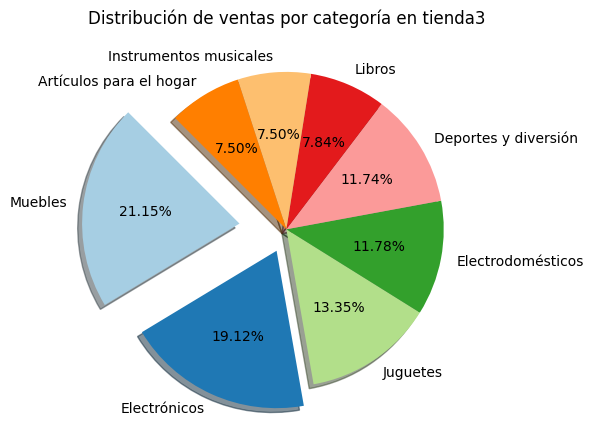

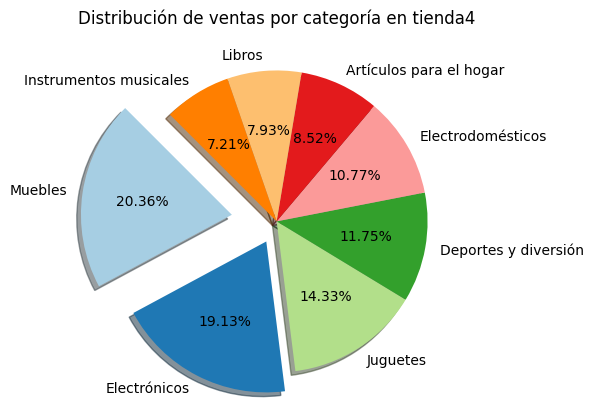

In [121]:
# Gráfico de torta 
import matplotlib.pyplot as plt

def graficar_por_categoria(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(conteo.values, labels=conteo.index, autopct='%1.2f%%', startangle=135, colors=plt.cm.Paired.colors, explode=[0.3,0.15,0,0,0,0,0,0], shadow=True)
    plt.title(f'Distribución de ventas por categoría en {nombre_tienda}')
    plt.tight_layout()
    plt.show()

graficar_por_categoria(tienda, 'tienda1')
graficar_por_categoria(tienda2, 'tienda2')
graficar_por_categoria(tienda3, 'tienda3')
graficar_por_categoria(tienda4, 'tienda4')

# 3. Calificación promedio de la tienda


In [122]:
# promedio de calificacion de los clientes


def promedio_calificacion(tienda):
    return round(tienda['Calificación'].mean(), 2)

In [123]:
calificaciones_promedio = {
    'tienda': float(promedio_calificacion(tienda)),
    'tienda2': float(promedio_calificacion(tienda2)),
    'tienda3': float(promedio_calificacion(tienda3)),
    'tienda4': float(promedio_calificacion(tienda4))
}

print(calificaciones_promedio)

{'tienda': 3.98, 'tienda2': 4.04, 'tienda3': 4.05, 'tienda4': 4.0}


In [124]:
print("Calificación promedio por tienda:")
for nombre, calificacion in calificaciones_promedio.items():
    print(f"{nombre}: {calificacion} estrellas")

Calificación promedio por tienda:
tienda: 3.98 estrellas
tienda2: 4.04 estrellas
tienda3: 4.05 estrellas
tienda4: 4.0 estrellas


In [125]:
mejor_tienda = max(calificaciones_promedio, key=calificaciones_promedio.get)
mejor_valor = calificaciones_promedio[mejor_tienda]
print(f"\nLa tienda mejor puntuada es {mejor_tienda} con {mejor_valor} estrellas.")


La tienda mejor puntuada es tienda3 con 4.05 estrellas.


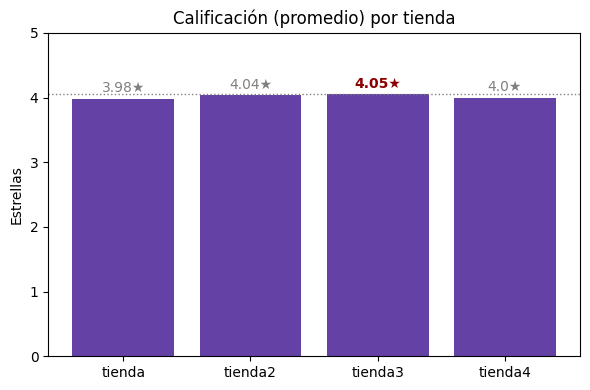

In [126]:
# Exploré el formato violin plot, pero me pareció bastante más complejo
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
tiendas = list(calificaciones_promedio.keys())      # variables
valores = list(calificaciones_promedio.values())    # variables

plt.bar(tiendas, valores, color='#6441a5') # color twitch
plt.title('Calificación (promedio) por tienda')
plt.ylabel('Estrellas')
plt.ylim(0, 5)

# Línea horizontal para destacar la mejor calificación
plt.axhline(y=mejor_valor, color='gray', linestyle='dotted', linewidth=1)

# Cada barra con su valor promedio (con ayuda de IA)
for i, (nombre, valor) in enumerate(calificaciones_promedio.items()):
    color = 'gray' if nombre != mejor_tienda else 'darkred'
    peso = 'bold' if nombre == mejor_tienda else 'normal'
    plt.text(i, valor + 0.1, f'{valor}★', ha='center', color=color, weight=peso)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [127]:
# Resolución sin gráfico
# .idxmax() - > en pandas devuelve el índice (etiqueta) del valor máximo dentro de una Serie o DataFrame

def extremos_ventas(df):
    contador = df['Producto'].value_counts()
    producto_mas_vendido = contador.idxmax()
    ventas_max = contador.max()
    producto_menos_vendido = contador.idxmin()
    ventas_min = contador.min()
    return producto_mas_vendido, ventas_max, producto_menos_vendido, ventas_min

In [128]:
tiendas_dict = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_dict.items():
    mas, cant_mas, menos, cant_menos = extremos_ventas(df)
    print(f"{nombre}:")
    print(f"  Más vendido: {mas} ({cant_mas} ventas)")
    print(f"  Menos vendido: {menos} ({cant_menos} ventas)\n")

Tienda 1:
  Más vendido: Microondas (60 ventas)
  Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
  Más vendido: Iniciando en programación (65 ventas)
  Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  Más vendido: Kit de bancas (57 ventas)
  Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  Más vendido: Cama box (62 ventas)
  Menos vendido: Guitarra eléctrica (33 ventas)



In [129]:
# Resolución con gráfico
def extremos_ventas(df):
    conteo = df['Producto'].value_counts()
    return conteo.idxmax(), conteo.max(), conteo.idxmin(), conteo.min()

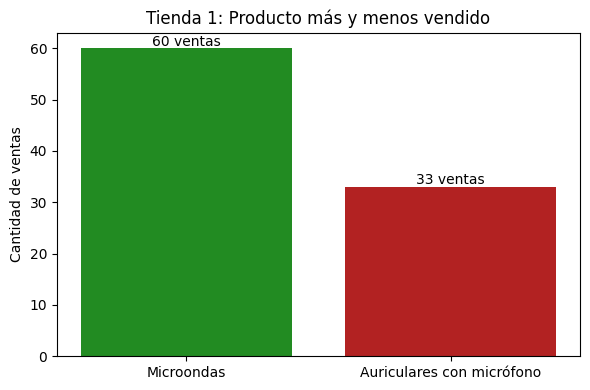

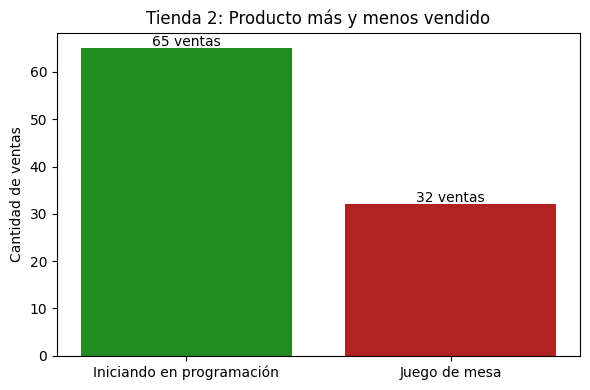

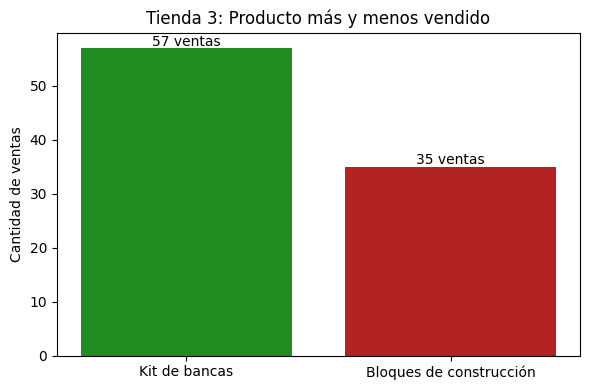

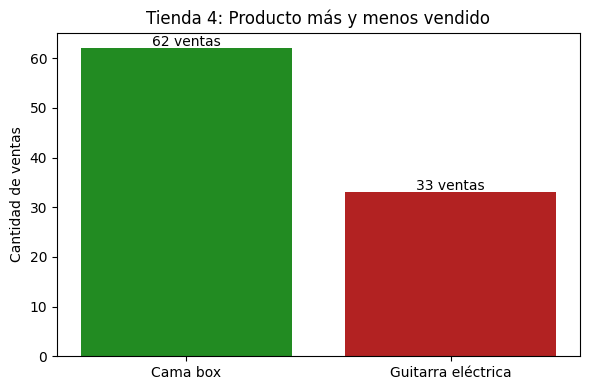

In [130]:
import matplotlib.pyplot as plt

def graficar_extremos_ventas(df, nombre_tienda):
    prod_max, ventas_max, prod_min, ventas_min = extremos_ventas(df)
    productos = [prod_max, prod_min]
    ventas = [ventas_max, ventas_min]
    colores = ['forestgreen', 'firebrick']

    plt.figure(figsize=(6, 4))
    plt.bar(productos, ventas, color=colores)
    for i in range(2):
        plt.text(i, ventas[i] + 0.5, f"{ventas[i]} ventas", ha='center')
    plt.title(f'{nombre_tienda}: Producto más y menos vendido')
    plt.ylabel('Cantidad de ventas')
    plt.tight_layout()
    plt.show()


graficar_extremos_ventas(tienda, 'Tienda 1')
graficar_extremos_ventas(tienda2, 'Tienda 2')
graficar_extremos_ventas(tienda3, 'Tienda 3')
graficar_extremos_ventas(tienda4, 'Tienda 4')

# 5. Costo de envío promedio por tienda

In [131]:

def costo_promedio_envio(tienda):
    return round(tienda['Costo de Envío'].mean(), 2)

# clave-valor > {tiendax: costo}
costo_envios_promedio = {
    'tienda': costo_promedio_envio(tienda),
    'tienda2': costo_promedio_envio(tienda2),
    'tienda3': costo_promedio_envio(tienda3),
    'tienda4': costo_promedio_envio(tienda4),
}

#print(envios_promedio)

In [132]:
for nombre, costo in costo_envios_promedio.items():
    print(f'{nombre}: ${costo}')

tienda: $26018.61
tienda2: $25216.24
tienda3: $24805.68
tienda4: $23459.46


In [133]:
# identificando al "ganador". 
# del diccionario costo_envios_promedio, recorre las claves.
# key=x.get indica que la comparacion se hace según los valores asociados a cada clave 

mas_barato = min(costo_envios_promedio, key=costo_envios_promedio.get)
print(f'Tienda con menores costos de envío: \n{mas_barato} por ${costo_envios_promedio[mas_barato]}')

Tienda con menores costos de envío: 
tienda4 por $23459.46


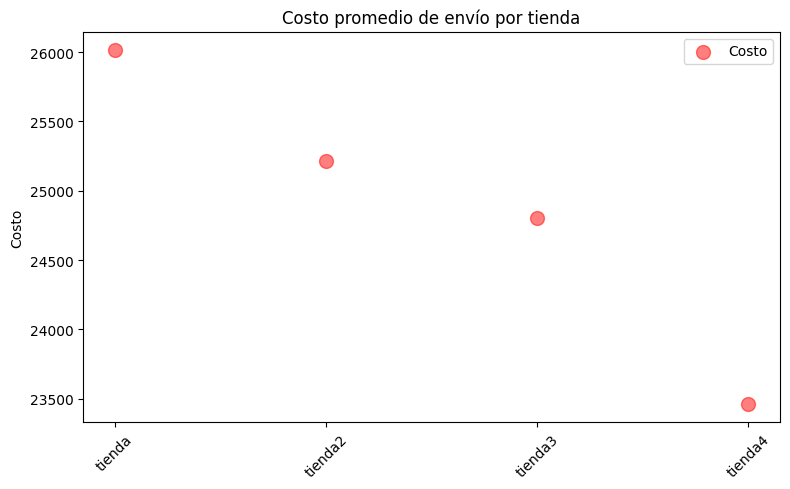

In [134]:
import matplotlib.pyplot as plt

# scatter es usado para evaluar correlaciones, sin embargo me pareció práctico usarlo de este modo
tiendas = list(costo_envios_promedio.keys())
costos = list(costo_envios_promedio.values())

plt.figure(figsize=(8, 5))
plt.scatter(
    tiendas, costos,    color="red", 
                        alpha=0.5, 
                        s=100,
                        label="Costo" #borrar
)  
plt.title("Costo promedio de envío por tienda")
plt.ylabel("Costo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

## Informe Final

#### Intro con el propósito del análisis. 

#### Desarrollo con la presentación de datos y gráficos. 

#### Una conclusión recomendando la tienda a vender y justificando la elección.



El señor Juan debiera deshacerse de la tienda 1 por los altos costes de envío. Ingresos, reseñas y rendimiento de ventas.
Evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.

## Desafío opcional

In [ ]:
# explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. 
# Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.
# con ayuda de ia

#tienda[['Latitud', 'Longitud']].describe()
tienda_ventas_geograficas = tienda.groupby(['Latitud', 'Longitud']).size().sort_values(ascending=False) # cuántas ventas ocurrieron por distribución
tienda_ventas_geograficas.head()


import folium

mapa = folium.Map(location=[tienda['Latitud'].mean(), tienda['Longitud'].mean()], zoom_start=6)

for _, row in tienda.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        popup=row['Producto'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(mapa)

mapa.save('mapa_ventas.html')